<a href="https://colab.research.google.com/github/MuthiahAinun/Proyek_Student_Dropout_Predicition/blob/main/Proyek_Droupout_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💡Proyek Data Science: [Student-dataset]
- **Nama:** [Tsamarah Muthi'ah Abdullah]
- **Email:** [a135xaf486@devacademy.id]
- **ID Dicoding:** [a135xaf48]

# **Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

# **Data Understanding**

In [2]:
## Load Dataset
df = pd.read_csv('students-performance.csv', sep=';')

In [3]:
# Display basic info
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (4424, 37)


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
print("Dataset Info:", df.info)
df.info()

Dataset Info: <bound method DataFrame.info of       Marital_status  Application_mode  Application_order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime_evening_attendance  Previous_qualification  \
0                              1                       1   
1    

In [ ]:
# Statistik deskriptif
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [4]:
# Check missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                

**tidak ada missing values**

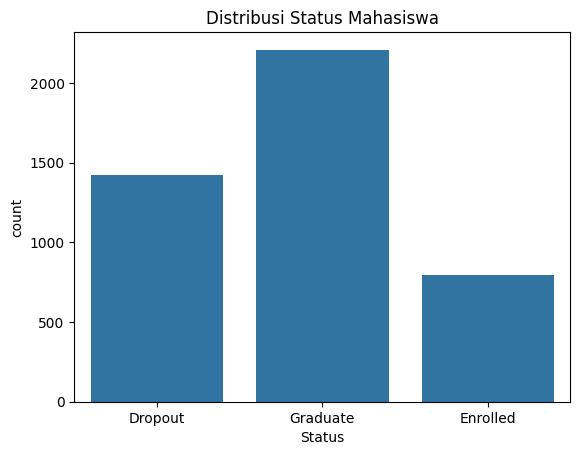

In [5]:
# Cek distribusi target (status)
sns.countplot(x='Status', data=df)
plt.title('Distribusi Status Mahasiswa')
plt.show()

### **🔎Analisis:**

1. **Graduate** memiliki jumlah terbanyak, menandakan sebagian besar mahasiswa berhasil menyelesaikan studi mereka.

2. **Dropout** berada di urutan kedua, menunjukkan bahwa cukup banyak mahasiswa yang tidak menyelesaikan studi.

3. **Enrolled** memiliki jumlah paling sedikit, artinya saat data diambil, mahasiswa aktif yang masih menjalani studi lebih sedikit dibanding yang sudah lulus atau keluar.

# **Data Preparation**

In [108]:
# Recode target to binary: Dropout=1, else=0
y = (df['Status'] == 'Dropout').astype(int)
X = df.drop('Status', axis=1)

In [109]:
# Feature Engineering
# Unit / grade derived features
X['Total_approved_units'] = (
    X['Curricular_units_1st_sem_approved'] +
    X['Curricular_units_2nd_sem_approved']
)
X['Avg_grade_all_sem'] = (
    X['Curricular_units_1st_sem_grade'] +
    X['Curricular_units_2nd_sem_grade']
) / 2
X['Total_units_enrolled'] = (
    X['Curricular_units_1st_sem_enrolled'] +
    X['Curricular_units_2nd_sem_enrolled']
)
X['Approval_rate'] = X['Total_approved_units'] / (X['Total_units_enrolled'] + 1e-5)

# Financial stress index
X['Financial_stress_index'] = (
    X['Debtor'] +
    (1 - X['Tuition_fees_up_to_date']) +
    (1 - X['Scholarship_holder'])
)

# Parental background
X['Parental_education_score'] = (
    X['Fathers_qualification'] +
    X['Mothers_qualification']
)
X['Parental_status_match'] = (
    (X['Fathers_occupation'] == X['Mothers_occupation']).astype(int) +
    (X['Fathers_qualification'] == X['Mothers_qualification']).astype(int)
)

# Age & application effort
X['Is_adult'] = (X['Age_at_enrollment'] >= 18).astype(int)
X['Application_effort_index'] = (
    X['Application_order'] +
    X['Application_mode']
)

In [111]:
print(y.value_counts())

Status
0    3003
1    1421
Name: count, dtype: int64


In [70]:
# Encoding target (gunakan LabelEncoder hanya untuk target)
target_le = LabelEncoder()
y_encoded = target_le.fit_transform(y)  # Dropout=0, Enrolled=1, Graduate=2

In [112]:
# Bagi fitur kategorikal dan numerik
cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(exclude="object").columns.tolist()

In [113]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Text(0, 0.5, 'Jumlah')

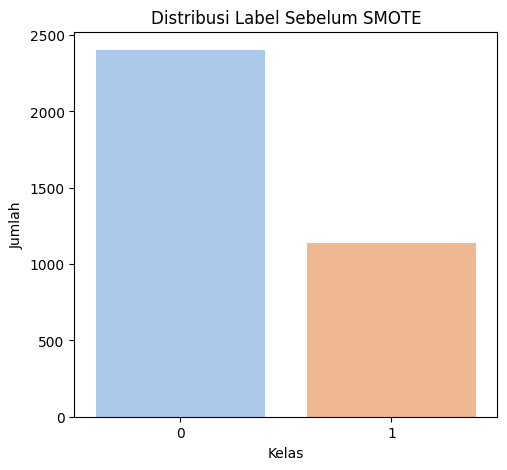

In [114]:
# Visualisasi distribusi label sebelum SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='pastel')
plt.title('Distribusi Label Sebelum SMOTE')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

Karena Distribusi data tidak seimbang, Model bisa jadi terlalu fokus pada mayoritas kelas (Graduate + Enrolled = 0) dan mengabaikan minoritas (Dropout = 1). Solusi yang akan digunakan : menggunakan teknik oversampling menggunakan **SMOTE**.

In [115]:
# Pipeline preprocessing
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("scaler", StandardScaler(), num_cols)
])

In [116]:
# SMOTE pada data latih
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_prep, y_train)

In [146]:
import joblib

# Simpan pipeline dan daftar kolom
joblib.dump((preprocessor, cat_cols, num_cols), "pipeline_lightgbm.pkl")

['pipeline_lightgbm.pkl']

In [148]:
preprocessor, cat_cols, num_cols = joblib.load("pipeline_lightgbm.pkl")

print("Kolom kategorikal:", cat_cols)
print("Kolom numerikal:", num_cols)

Kolom kategorikal: []
Kolom numerikal: ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP', 'Total_approve

In [136]:
from sklearn.utils.validation import check_is_fitted
check_is_fitted(preprocessor)

In [117]:
from collections import Counter
print("Distribusi sebelum SMOTE:", Counter(y_train))
print("Distribusi sesudah SMOTE:", Counter(y_train_smote))

Distribusi sebelum SMOTE: Counter({0: 2402, 1: 1137})
Distribusi sesudah SMOTE: Counter({1: 2402, 0: 2402})


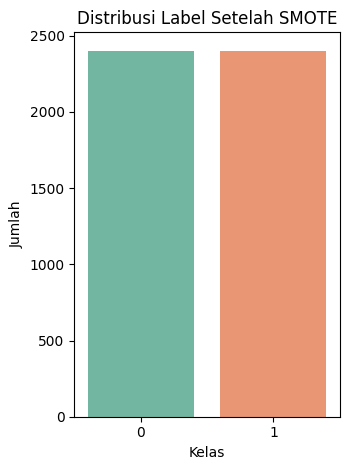

In [118]:
# Visualisasi distribusi label setelah SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_smote, palette='Set2')
plt.title('Distribusi Label Setelah SMOTE')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

# **Modeling**

In [127]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Deklarasi model LightGBM
lgb_model = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    class_weight='balanced',
    random_state=42
)

In [128]:
# Parameter grid untuk tuning
param_grid = {
    'n_estimators': [300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'num_leaves': [15, 31, 63],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0.0, 0.1],
    'reg_lambda': [0.0, 0.1]
}

In [129]:
# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='f1',  # Karena fokus klasifikasi Dropout (positif class)
    verbose=1,
    n_jobs=-1
)

In [130]:
# Jalankan grid search
grid_search.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
[LightGBM] [Info] Number of positive: 2402, number of negative: 2402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8156
[LightGBM] [Info] Number of data points in the train set: 4804, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

GridSearchCV(cv=3,
             estimator=LGBMClassifier(class_weight='balanced',
                                      objective='binary', random_state=42),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [300, 500, 1000],
                         'num_leaves': [15, 31, 63], 'reg_alpha': [0.0, 0.1],
                         'reg_lambda': [0.0, 0.1],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='f1', verbose=1)

In [131]:
# Tampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score on Validation:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 300, 'num_leaves': 63, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.6}
Best F1 Score on Validation: 0.8961217383950139


# **Evaluasi**

In [132]:
# Evaluasi pada data test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_prep)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_pred, target_names=['Non‑Dropout','Dropout']))

Accuracy on Test Set: 0.8915254237288136

Classification Report on Test Set:
               precision    recall  f1-score   support

 Non‑Dropout       0.91      0.94      0.92       601
     Dropout       0.85      0.80      0.83       284

    accuracy                           0.89       885
   macro avg       0.88      0.87      0.87       885
weighted avg       0.89      0.89      0.89       885



In [141]:
import joblib
# Simpan model
joblib.dump(best_model, 'LightGBM_model.pkl')

['LightGBM_model.pkl']

In [138]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_curve

# Ambil probabilitas prediksi untuk kelas positif (Dropout)
y_proba = best_model.predict_proba(X_test_prep)[:, 1]

# 2. Tentukan rentang threshold yang ingin diuji
thresholds = np.linspace(0.0, 1.0, 101)

best_thresh = 0.5
best_f1 = 0

# 3. Uji setiap threshold dan simpan F1 terbaik
for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print(f"🔍 Best threshold based on F1-score: {best_thresh:.2f} (F1 = {best_f1:.4f})\n")

🔍 Best threshold based on F1-score: 0.58 (F1 = 0.8343)



In [139]:
y_pred_best = (y_proba >= best_thresh).astype(int)
print("=== Classification Report (Best Threshold) ===")
print(classification_report(y_test, y_pred_best, target_names=['Non‑Dropout','Dropout']))

=== Classification Report (Best Threshold) ===
              precision    recall  f1-score   support

 Non‑Dropout       0.91      0.95      0.93       601
     Dropout       0.89      0.79      0.83       284

    accuracy                           0.90       885
   macro avg       0.90      0.87      0.88       885
weighted avg       0.90      0.90      0.90       885



Setelah mengatur threshold untuk meningkatkan akurasi berdasarkan nilai f1-score, didapatkan nilai threshold terbaik pada **0.58** dengan akurasi mencapai **90%**.

In [142]:
import json
# Simpan threshold optimal
threshold = 0.58
with open('optimal_threshold.json', 'w') as f:
    json.dump({'threshold': threshold}, f)

# **Feature Importance**

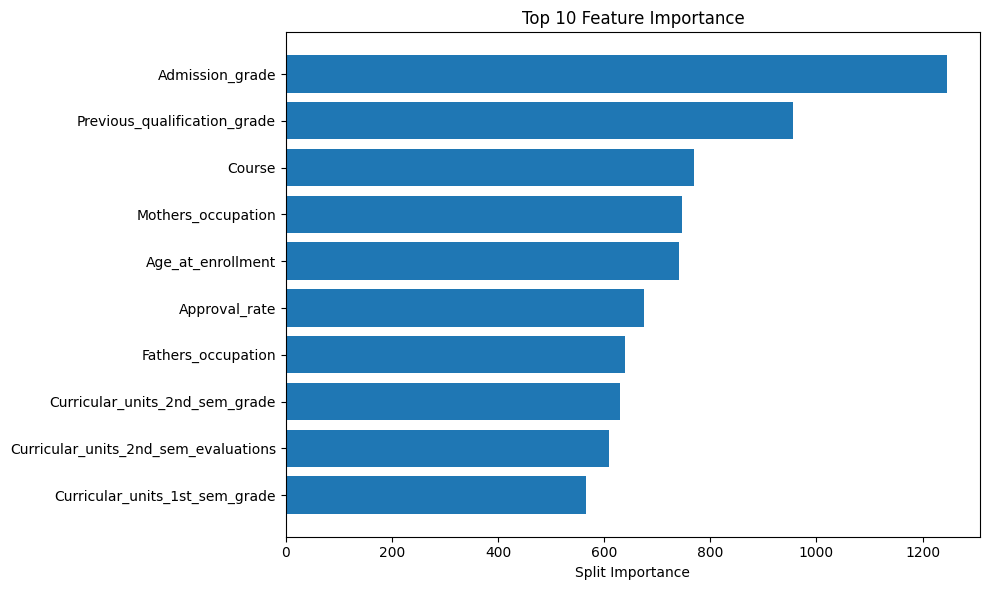

In [5]:
import joblib

# Load model
model = joblib.load("LightGBM_model.pkl")

# Load pipeline (preprocessor dan daftar kolom)
preprocessor, cat_cols, num_cols = joblib.load("pipeline_lightgbm.pkl")

# Gabungkan nama fitur asli sesuai urutan input ke model
# Catatan: Ini berasumsi tidak ada transformasi kolom non-linear (hanya encoding & scaling)
feature_names = cat_cols + num_cols

# Ambil importance dari model
importance = model.booster_.feature_importance(importance_type='split')
sorted_idx = importance.argsort()[::-1]

# Top N features
top_n = 10
top_features = [feature_names[i] for i in sorted_idx[:top_n]]
top_scores = importance[sorted_idx[:top_n]]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), top_scores[::-1])
plt.yticks(range(top_n), top_features[::-1])
plt.xlabel("Split Importance")
plt.title("Top 10 Feature Importance")
plt.tight_layout()
plt.show()

In [143]:
# Ambil nama fitur asli dan importance dari model
feature_names = X.columns  # X adalah DataFrame fitur sebelum preprocessing
importances = best_model.feature_importances_  # best_model adalah model LGBM ter-tuning

# Buat DataFrame dan urutkan berdasarkan importance
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Simpan ke CSV
feat_imp_df.to_csv('feature_importance.csv', index=False)

print("Feature importance telah disimpan ke file 'feature_importance.csv'")

Feature importance telah disimpan ke file 'feature_importance.csv'


# **📊 Analisis Feature Importance**

Berikut adalah fitur-fitur paling berpengaruh terhadap prediksi dropout (dari paling tinggi ke paling rendah):

Rank	Fitur	Deskripsi Singkat
1. **Admission_grade**	Nilai saat masuk—indikator kesiapan awal mahasiswa.
2. **Previous_qualification_grade**	Nilai pendidikan sebelumnya.
3. **Course**	Jenis/jurusan studi.
4. **Mothers_occupation**	Latar belakang pekerjaan ibu.
5. **Age_at_enrollment**	Usia saat mendaftar.
6. **Approval_rate**	Rasio lulus terhadap jumlah unit yang diambil.
7. **Fathers_occupation**	Latar belakang pekerjaan ayah.
8. **Curricular_units_2nd_sem_grade**	Nilai semester 2.
9. **Curricular_units_2nd_sem_evaluations**	Jumlah evaluasi semester 2.
10. **Curricular_units_1st_sem_grade**	Nilai semester 1.

# **✅ Action Items untuk Jaya Jaya Institut**

**✅ Insights & Recommended Action Items**

1. 🎯 **Intervensi Berdasarkan Nilai Masuk**

  **Insight:** Mahasiswa dengan nilai masuk rendah (Admission_grade) sangat rentan dropout.

  **Action:** Berikan program matrikulasi atau bimbingan belajar tambahan sejak awal semester.

2. 🧠 **Analisis Berdasarkan Riwayat Akademik**

  **Insight:** Nilai pendidikan sebelumnya (Previous_qualification_grade) juga krusial.

  **Action:**

- Identifikasi mahasiswa dengan nilai akademik sebelumnya rendah.
- Terapkan sistem early warning berdasarkan performa awal.


3. 🧑‍🎓 **Evaluasi Program Studi Tertentu**

  **Insight:** Fitur Course cukup berpengaruh—mungkin ada jurusan dengan dropout tinggi.

  **Action:**

- Lakukan audit akademik dan psikososial terhadap jurusan dengan dropout tinggi.

- Perbaiki kurikulum, tingkat stres, atau beban SKS.

4. 👪 **Latar Belakang Keluarga**

  **Insight:** Pekerjaan orang tua (terutama ibu) berdampak besar.

  **Action:**

- Berikan pendampingan finansial/psikologis kepada mahasiswa dari keluarga rentan.

- Buka akses beasiswa berdasarkan kondisi sosial-ekonomi.

5. 🎓 **Umur dan Kemampuan Menyesuaikan Diri**

  **Insight:** Usia saat mendaftar (Age_at_enrollment) berpengaruh—mungkin terkait adaptasi dan tanggung jawab keluarga.

  **Action:**

- Sediakan layanan konseling untuk mahasiswa usia non-tradisional.

- Buat kelompok belajar lintas usia.

6. 📉 **Kinerja Akademik Awal**

  **Insight:** Nilai dan evaluasi pada semester 1 & 2 penting.

  **Action:**

- Implementasi sistem pemantauan nilai mingguan.

- Kirim alert ke dosen PA dan akademik jika nilai mulai menurun.